In [1]:
import pandas as pd
import numpy as np

In [2]:
banking=pd.read_csv("D:/data analysis/banking_dirty.csv")
banking.head()

,cust_id,birth_date,Age,acct_amount,inv_amount,fund_A,fund_B,fund_C,fund_D,account_opened,last_transaction,acct_cur
0,870A9281,6/9/1962,58,63523.31,51295,30105.0,4138.0,1420.0,15632.0,2/9/2018,22-02-19,dollar
1,166B05B0,12/16/1962,58,38175.46,15050,4995.0,938.0,6696.0,2421.0,28-02-19,31-10-18,dollar
2,BFC13E88,9/12/1990,34,59863.77,24567,10323.0,4590.0,8469.0,1185.0,25-04-18,2/4/2018,dollar
3,F2158F66,11/3/1985,35,84132.10,23712,3908.0,492.0,6482.0,12830.0,7/11/2017,8/11/2018,dollar
4,7A73F334,5/17/1990,30,120512.00,93230,12158.4,51281.0,13434.0,18383.0,14-05-18,19-07-18,dollar


###### Uniform currencies

In [3]:
banking['acct_cur'].value_counts()

dollar    97
euro       3
Name: acct_cur, dtype: int64

In [4]:
acct_eu = banking['acct_cur'] == 'euro'

In [5]:
# Find values of acct_cur that are equal to 'euro'
acct_eu = banking['acct_cur'] == 'euro'

# Convert acct_amount where it is in euro to dollars
banking.loc[acct_eu, 'acct_amount'] = banking.loc[acct_eu, 'acct_amount'] * 1.1


# Unify acct_cur column by changing 'euro' values to 'dollar'
banking.loc[acct_eu, 'acct_cur'] = 'dollar'

# Assert that only dollar currency remains
assert banking['acct_cur'].unique() == 'dollar'

###### uniform date

In [6]:
banking['account_opened'].head()

0     2/9/2018
1     28-02-19
2     25-04-18
3    7/11/2017
4     14-05-18
Name: account_opened, dtype: object

In [7]:
# Print the header of account_opened
print(banking['account_opened'].head())

# Convert account_opened to datetime
#banking['account_opened'] = pd.to_datetime(banking['account_opened'],
                                           # Infer datetime format
                                          # infer_datetime_format = True,
                                           # Return missing value for er
                                           #errors = 'coerce') 
                
banking['account_opened'] = pd.to_datetime(banking['account_opened'])

0     2/9/2018
1     28-02-19
2     25-04-18
3    7/11/2017
4     14-05-18
Name: account_opened, dtype: object


In [8]:
# Get year of account opened
banking['acct_year'] = banking['account_opened'].dt.strftime('%Y')

# Print acct_year
print(banking['acct_year'] )

0     2018
1     2019
2     2018
3     2017
4     2018
      ... 
95    2018
96    2017
97    2017
98    2017
99    2017
Name: acct_year, Length: 100, dtype: object


###### cross field validation

In [9]:
# Store fund columns to sum against
fund_columns = ['fund_A', 'fund_B', 'fund_C', 'fund_D']


In [10]:

# Find rows where fund_columns row sum == inv_amount
inv_equ = banking[fund_columns].sum(axis = 1) == banking['inv_amount']


In [11]:
# Store consistent and inconsistent data
consistent_inv = banking[inv_equ]
inconsistent_inv = banking[~inv_equ]
# Store consistent and inconsistent data
print("Number of inconsistent investments: ", inconsistent_inv.shape[0])

Number of inconsistent investments:  8


In [12]:
banking[~inv_equ]

,cust_id,birth_date,Age,acct_amount,inv_amount,fund_A,fund_B,fund_C,fund_D,account_opened,last_transaction,acct_cur,acct_year
4,7A73F334,5/17/1990,30,120512.000,93230,12158.40,51281.00,13434.00,18383.00,2018-05-14,19-07-18,dollar,2018
12,EEBD980F,11/20/1990,34,57838.490,50812,18314.00,1477.00,29049.48,5539.00,2018-08-12,4/1/2020,dollar,2018
22,96525DA6,11/23/1992,28,82511.240,33927,8206.00,15019.00,5559.60,6182.00,2018-07-23,7/8/2018,dollar,2018
43,38B8CD9C,6/25/1970,50,28834.710,27531,314.00,6072.28,14163.00,7908.00,2018-09-17,5/2/2020,dollar,2018
47,68C55974,7/8/1962,58,95038.140,66796,33764.00,5042.00,10659.00,19237.41,2018-03-04,25-09-18,dollar,2018
65,0A9BA907,9/21/1966,54,90469.530,70171,28615.00,21720.05,11906.00,10763.00,2018-06-15,28-08-18,dollar,2018
89,C580AE41,6/1/1968,52,106340.707,68466,8489.36,28592.00,2439.00,30419.00,2018-09-28,17-09-18,dollar,2018
92,A07D5C92,9/20/1990,30,99577.360,60407,6467.00,20861.00,9861.00,26004.16,2017-11-17,16-01-20,dollar,2017


In [13]:
import datetime as dt

In [14]:
# Convert account_opened to datetime
banking['birth_date'] = pd.to_datetime(banking['birth_date'])

#from datetime import datetime
#from dateutil.relativedelta import relativedelta

#three_yrs_ago = datetime.now() - relativedelta(years=4)
#three_yrs_ago

In [15]:
# Store today's date and find ages
today = dt.date.today()
ages_manual = today.year - banking['birth_date'].dt.year

# Find rows where age column == ages_manual
age_equ = ages_manual == banking['Age']

# Store consistent and inconsistent data
consistent_ages = banking[age_equ]
inconsistent_ages = banking[~age_equ]

# Store consistent and inconsistent data
print("Number of inconsistent ages: ", inconsistent_ages.shape[0])

Number of inconsistent ages:  100


In [16]:
 banking[~age_equ]

,cust_id,birth_date,Age,acct_amount,inv_amount,fund_A,fund_B,fund_C,fund_D,account_opened,last_transaction,acct_cur,acct_year
0,870A9281,1962-06-09,58,63523.31,51295,30105.0,4138.0,1420.0,15632.0,2018-02-09,22-02-19,dollar,2018
1,166B05B0,1962-12-16,58,38175.46,15050,4995.0,938.0,6696.0,2421.0,2019-02-28,31-10-18,dollar,2019
2,BFC13E88,1990-09-12,34,59863.77,24567,10323.0,4590.0,8469.0,1185.0,2018-04-25,2/4/2018,dollar,2018
3,F2158F66,1985-11-03,35,84132.10,23712,3908.0,492.0,6482.0,12830.0,2017-07-11,8/11/2018,dollar,2017
4,7A73F334,1990-05-17,30,120512.00,93230,12158.4,51281.0,13434.0,18383.0,2018-05-14,19-07-18,dollar,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,CA507BA1,1974-08-10,46,12209.84,7515,190.0,931.0,1451.0,4943.0,2018-05-26,11/9/2019,dollar,2018
96,B99CD662,1989-12-12,31,92838.44,49089,2453.0,7892.0,31486.0,7258.0,2017-04-05,12/3/2019,dollar,2017
97,13770971,1984-11-29,36,92750.87,27962,3352.0,7547.0,8486.0,8577.0,2017-08-16,24-04-19,dollar,2017
98,93E78DA3,1969-12-14,51,41942.23,29662,1758.0,11174.0,11650.0,5080.0,2017-09-10,15-04-18,dollar,2017


In [17]:
banking.shape

(100, 13)

In [18]:
banking.head()

,cust_id,birth_date,Age,acct_amount,inv_amount,fund_A,fund_B,fund_C,fund_D,account_opened,last_transaction,acct_cur,acct_year
0,870A9281,1962-06-09,58,63523.31,51295,30105.0,4138.0,1420.0,15632.0,2018-02-09,22-02-19,dollar,2018
1,166B05B0,1962-12-16,58,38175.46,15050,4995.0,938.0,6696.0,2421.0,2019-02-28,31-10-18,dollar,2019
2,BFC13E88,1990-09-12,34,59863.77,24567,10323.0,4590.0,8469.0,1185.0,2018-04-25,2/4/2018,dollar,2018
3,F2158F66,1985-11-03,35,84132.10,23712,3908.0,492.0,6482.0,12830.0,2017-07-11,8/11/2018,dollar,2017
4,7A73F334,1990-05-17,30,120512.00,93230,12158.4,51281.0,13434.0,18383.0,2018-05-14,19-07-18,dollar,2018


###### missing data

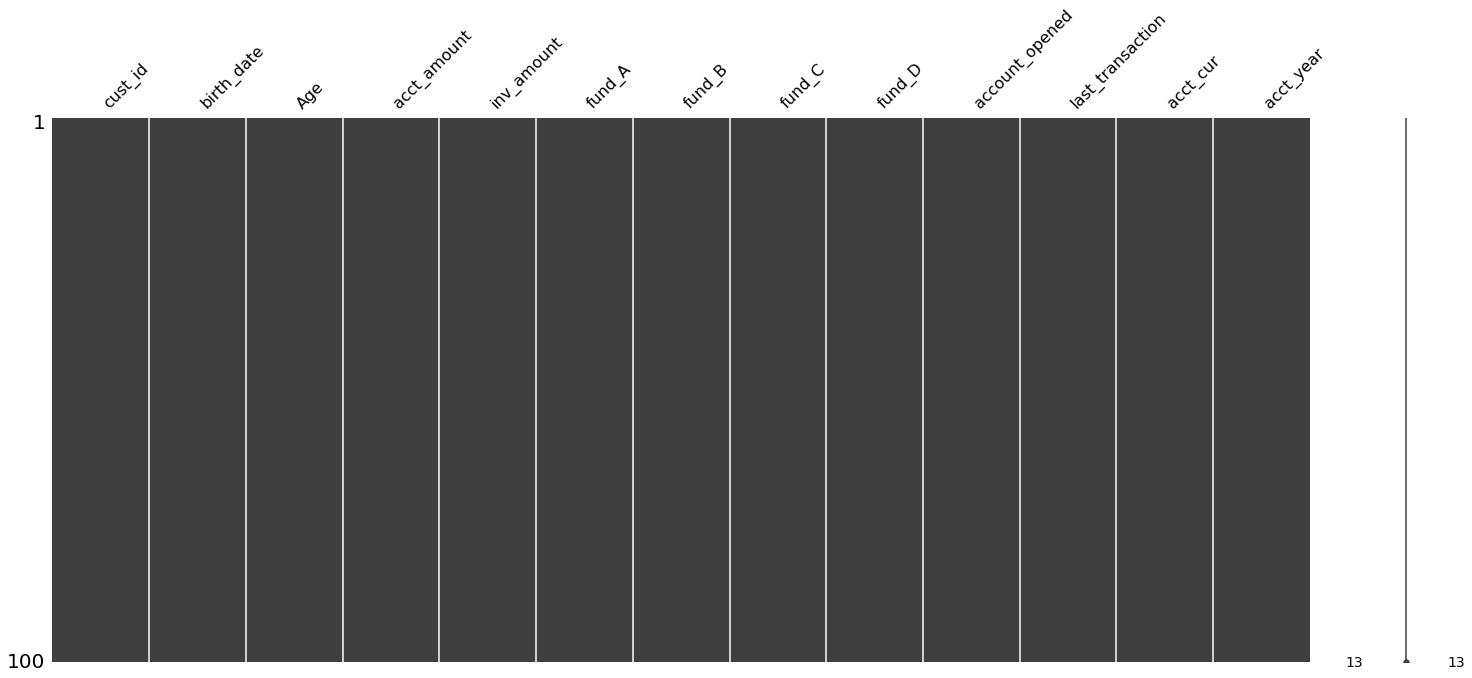

In [19]:
import missingno as msno
import matplotlib.pyplot as plt
# Visualize missingness
msno.matrix(banking)
plt.show()

cust_id             0
birth_date          0
Age                 0
acct_amount         0
inv_amount          0
fund_A              0
fund_B              0
fund_C              0
fund_D              0
account_opened      0
last_transaction    0
acct_cur            0
acct_year           0
dtype: int64


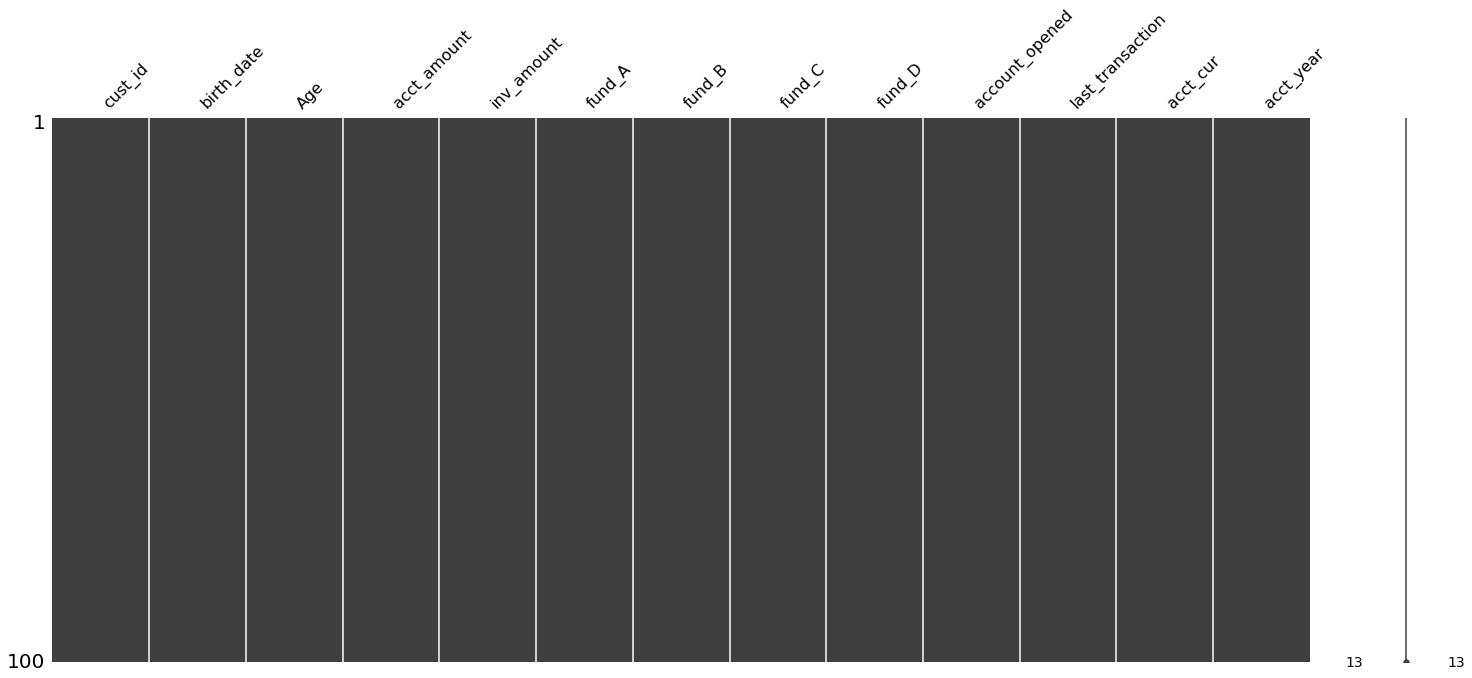

In [20]:
# Print number of missing values in banking
print(banking.isna().sum())

# Visualize missingness matrix
msno.matrix(banking)
plt.show()

In [21]:
# Isolate missing and non missing values of inv_amount
missing_date = banking[banking['account_opened'].isna()]
date =banking[~banking['account_opened'].isna()]

In [22]:
missing_date.describe()

,Age,acct_amount,inv_amount,fund_A,fund_B,fund_C,fund_D
count,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
date.describe()

,Age,acct_amount,inv_amount,fund_A,fund_B,fund_C,fund_D
count,100.000000,1.000000e+02,100.000000,100.000000,100.00000,100.00000,100.00000
mean,43.170000,3.027827e+06,46006.300000,11474.067600,11824.45330,11901.84080,10971.52570
std,10.120541,2.104210e+07,26526.791616,12432.069917,11081.38577,14084.34211,9487.15002
min,27.000000,1.220984e+04,3214.000000,41.000000,312.00000,67.00000,118.00000
25%,34.000000,5.921813e+04,23524.250000,2317.000000,3387.50000,2272.25000,4044.75000
50%,45.500000,8.334416e+04,45785.500000,6489.000000,8089.00000,6811.00000,8480.00000
75%,51.000000,9.509747e+04,66595.750000,15585.000000,17678.25000,15426.75000,15754.00000
max,63.000000,1.737431e+08,96614.000000,58179.000000,51281.00000,75499.00000,51708.00000


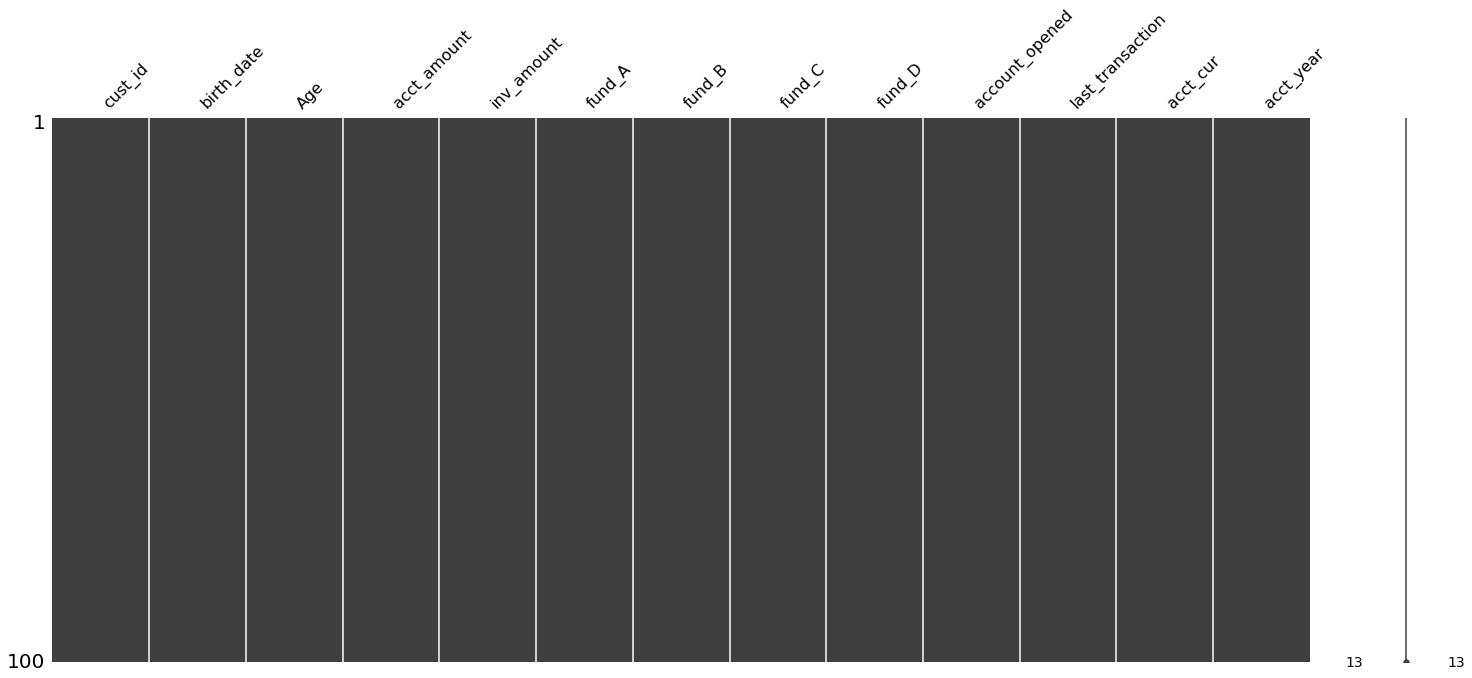

In [24]:
banking_sorted = banking.sort_values('acct_year')
msno.matrix(banking_sorted)
plt.show()

In [25]:
# Drop missing values of cust_id
banking_fullid = banking.dropna(subset = ['cust_id'])

# Compute estimated acct_amount
acct_imp = banking_fullid['inv_amount']*5

# Impute missing acct_amount with corresponding acct_imp
banking_imputed = banking_fullid.fillna({'acct_amount':acct_imp})

# Print number of missing values
print(banking_imputed.isna().sum())


cust_id             0
birth_date          0
Age                 0
acct_amount         0
inv_amount          0
fund_A              0
fund_B              0
fund_C              0
fund_D              0
account_opened      0
last_transaction    0
acct_cur            0
acct_year           0
dtype: int64
